In [ ]:
from dotenv import load_dotenv
import os
import sys

load_dotenv()

CAMB_KEY = os.getenv("CAMB_KEY")
OPENROUTER_KEY = os.getenv("OPENROUTER_KEY")
TOGETHER_KEY = os.getenv("TOGETHER_KEY")

# 1. Text GPT (OpenRouter)

In [ ]:
from openai import OpenAI

client = OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key=OPENROUTER_KEY,
)

completion = client.chat.completions.create(
  extra_headers={
    "HTTP-Referer": "<YOUR_SITE_URL>", # Optional. Site URL for rankings on openrouter.ai.
    "X-Title": "<YOUR_SITE_NAME>", # Optional. Site title for rankings on openrouter.ai.
  },
  extra_body={},
#   model="mistralai/mistral-small-3.1-24b-instruct:free",
     model="deepseek/deepseek-prover-v2:free",
#   messages=[
#     {
#       "role": "user",
#       "content": [
#         {
#           "type": "text",
#           "text": "What is in this image?"
#         },
#         {
#           "type": "image_url",
#           "image_url": {
#             "url": "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg"
#           }
#         }
#       ]
#     }
#   ]
    messages=[
        {
        "role": "user",
        "content": [
            {
            "type": "text",
            "text": "Hãy gợi ý cho tôi 3 chủ đề để viết một bài luận về chủ đề \"Thể thao\"."
            },
        ]    
        }

    ]
)
print(completion.choices[0].message.content)

1. **Tác động của thể thao đến sức khỏe tâm lý và xã hội của giới trẻ.**
   - Thể thao không chỉ nâng cao sức khỏe thể chất mà còn có vai trò quan trọng trong việc cải thiện sức khỏe tâm lý và xã hội của thanh thiếu niên. Bài luận có thể thảo luận về cách thể thao giúp giảm căng thẳng, tăng cường sự tự tin, và phát triển kỹ năng giao tiếp và làm việc nhóm.

2. **Vai trò của thể thao trong việc khắc phục sự bất bình đẳng giới.**
   - Thể thao đã trở thành một công cụ mạnh mẽ trong việc phá vỡ các định kiến giới và tạo ra cơ hội bình đẳng cho mọi cá nhân. Bài luận có thể nghiên cứu cách thể thao nữ được phát triển, sự tham gia của phụ nữ trong các môn thể thao, cũng như các vấn đề và thách thức mà họ phải đối mặt.

3. **Tác động của công nghệ trong thể thao hiện đại.**
   - Công nghệ đang thay đổi cách thức chúng ta tham gia và thưởng thức thể thao. Bài luận có thể khám phá các tiến bộ công nghệ như video trọng tài (VAR), thiết bị đeo thông minh, phân tích dữ liệu thể thao, và ảnh hưởng 

# 2. Text to Speech (Camb.ai)

In [ ]:
import requests, os, time

BASE_URL = "https://client.camb.ai/apis"
HEADERS = {"headers": {"x-api-key": CAMB_KEY}}

tts_payload = {
    "text": "Khi tham gia chat, bạn có thể nhắn tin và nhận được thông báo. Nếu đoạn chat đã đủ người mà bạn không hoạt động, bạn có thể sẽ phải tham gia lại.",
    "voice_id": 20298,  # Example voice ID
    "language": 136,  # VN
    "age": 30,
    "gender": 1,  # Male
}

res = requests.post(f"{BASE_URL}/tts", json=tts_payload, **HEADERS)
task_id = res.json()["task_id"]
print(f"Task ID: {task_id}")

while True:
    res = requests.get(f"{BASE_URL}/tts/{task_id}", **HEADERS)
    status = res.json()["status"]
    print(f"Polling: {status}")
    time.sleep(1.5)
    if status == "SUCCESS":
        run_id = res.json()["run_id"]
        break

print(f"Run ID: {run_id}")
res = requests.get(f"{BASE_URL}/tts-result/{run_id}", **HEADERS, stream=True)
with open("tts_output.wav", "wb") as f:
    for chunk in res.iter_content(chunk_size=1024):
        f.write(chunk)
print("Done!")

Task ID: 2c7e7dd6-fbc1-48ac-b566-0e8b3263340c
Polling: PENDING
Polling: PENDING
Polling: PENDING
Polling: PENDING
Polling: PENDING
Polling: SUCCESS
Run ID: 200253
Done!


Available Voices

In [ ]:
import requests

url = "https://client.camb.ai/apis/list-voices"

headers = {"x-api-key": CAMB_KEY}

response = requests.request("GET", url, headers=headers)

print(response.text)

[{"id":20298,"voice_name":"Daniel","gender":1,"age":33,"language":1,"transcript":null,"description":"A steady, monotone voice with a reflective quality, suited for philosophical conversations and introspective dialogue.","is_published":false},{"id":20303,"voice_name":"Arielle","gender":2,"age":28,"language":1,"transcript":null,"description":"A deep, thoughtful voice with a serious tone, ideal for literary narration and conveying profound stories.","is_published":false},{"id":20305,"voice_name":"Alice","gender":2,"age":65,"language":1,"transcript":null,"description":"A warm, steady voice with a calm tone and a touch of enthusiastic energy, perfect for engaging narration.","is_published":false},{"id":20299,"voice_name":"Gary","gender":1,"age":35,"language":1,"transcript":null,"description":"A rich, warm voice brimming with emotion and dynamic expression, perfect for dramatic readings that captivate the listener.","is_published":false}]


Available Languages

In [ ]:
import requests

url = "https://client.camb.ai/apis/source-languages"

headers = {"x-api-key": CAMB_KEY}

response = requests.request("GET", url, headers=headers)

print(response.text)

[{"id":1,"language":"english (united states)","short_name":"en-us"},{"id":2,"language":"afrikaans (south africa)","short_name":"af-za"},{"id":3,"language":"amharic (ethiopia)","short_name":"am-et"},{"id":4,"language":"arabic (united arab emirates)","short_name":"ar-ae"},{"id":5,"language":"arabic (bahrain)","short_name":"ar-bh"},{"id":6,"language":"arabic (algeria)","short_name":"ar-dz"},{"id":7,"language":"arabic (egypt)","short_name":"ar-eg"},{"id":8,"language":"arabic (iraq)","short_name":"ar-iq"},{"id":9,"language":"arabic (jordan)","short_name":"ar-jo"},{"id":10,"language":"arabic (kuwait)","short_name":"ar-kw"},{"id":11,"language":"arabic (lebanon)","short_name":"ar-lb"},{"id":12,"language":"arabic (libya)","short_name":"ar-ly"},{"id":13,"language":"arabic (morocco)","short_name":"ar-ma"},{"id":14,"language":"arabic (oman)","short_name":"ar-om"},{"id":15,"language":"arabic (qatar)","short_name":"ar-qa"},{"id":16,"language":"arabic (saudi arabia)","short_name":"ar-sa"},{"id":17,"l

# 3. Text to Image (Together.ai)

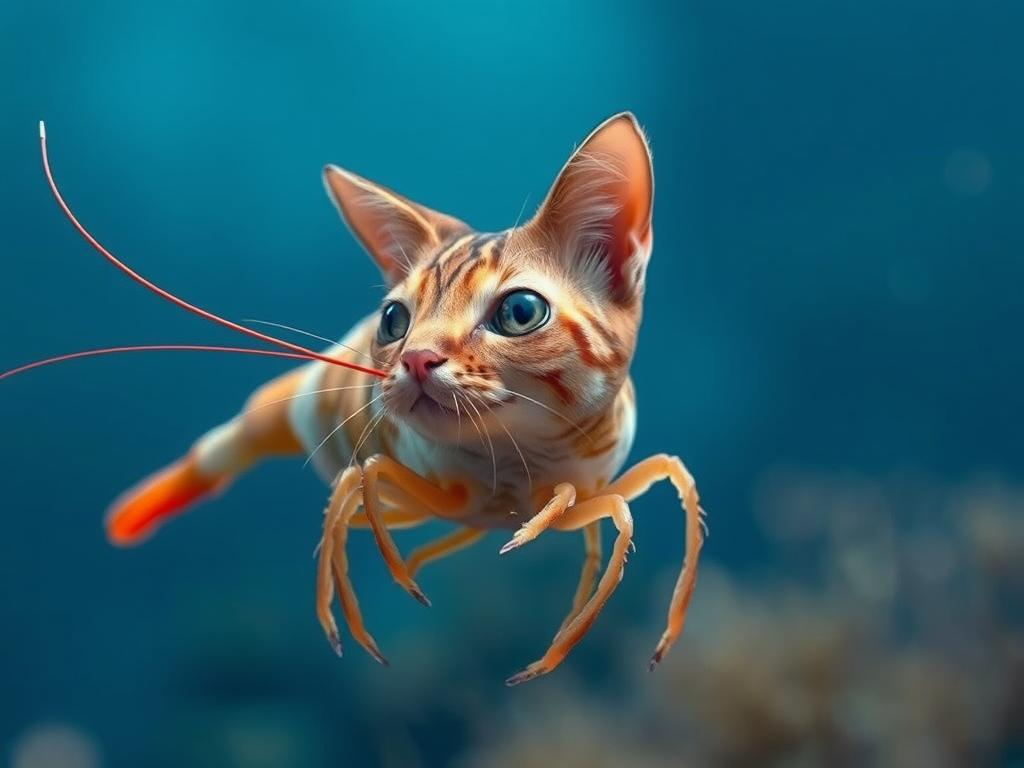

In [ ]:
from together import Together
import os
import base64
from PIL import Image
from io import BytesIO
from IPython.display import display

os.environ["TOGETHER_API_KEY"] = TOGETHER_KEY

client = Together()
response = client.images.generate(
    prompt="a shrimp having a cat head, swimming in the sea",
    model="black-forest-labs/FLUX.1-schnell-Free",
    width=1024,
    height=768,
    steps=4,
    n=1,
    response_format="b64_json",
    stop=[]
)
# Decode the base64 image data
image_data = base64.b64decode(response.data[0].b64_json)

# Convert the binary data to an image
image = Image.open(BytesIO(image_data))

# Display the image in the Jupyter Notebook

display(image)
